In [1]:
import torch
import struct

import numpy as np

from array import array

from dataset import Mnist
from model import MnistModel, ClassificationMnist
from utils import train_mnist_ae, train_mnist_classification

import random
import matplotlib.pyplot as plt

In [2]:
train_data = Mnist("train-images.idx3-ubyte", "train-labels.idx1-ubyte")
test_data = Mnist("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte")

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=256, shuffle=True, num_workers=12
)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=256, num_workers=12
)

In [3]:
def plot_result(train_losses, test_losses):
    x = list(range(len(train_losses)))
    plt.plot(x, train_losses, label="train losses")
    plt.plot(x, test_losses, label="test losses")
    plt.legend(["train losses", "test losses"])
    plt.show()

In [4]:
def show_result(model, test_loader):
    model.eval()
    photos_count = 5

    orig_images, _ = next(iter(test_loader))
    orig_images = orig_images / 255 
    f, imgs = plt.subplots(2, photos_count)
    f.tight_layout(pad=1/photos_count)
    f.set_figheight(5)
    f.set_figwidth(16)

    images = model(orig_images.to(torch.float32).cuda())
    images = images.detach().cpu().numpy()
    images[images > 1] = 1
    images[images < 0] = 0
    
    for i in range(photos_count):
        j = random.randint(0, len(orig_images))
        showed_img = orig_images[j][0], images[j][0]
        imgs[0, i].imshow(showed_img[0])
        imgs[1, i].imshow(showed_img[1])

    plt.show()

In [5]:
model = MnistModel().cuda()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [6]:
train_losses, test_losses = train_mnist_ae(
    100, model, train_loader, test_loader, loss_function, optimizer, noti_rate=5
)

Train Epoch: 5 train loss: 0.0887 test loss: 0.0825
Train Epoch: 10 train loss: 0.0528 test loss: 0.0504
Train Epoch: 15 train loss: 0.036 test loss: 0.0341
Train Epoch: 20 train loss: 0.0266 test loss: 0.0259
Train Epoch: 25 train loss: 0.0208 test loss: 0.02
Train Epoch: 30 train loss: 0.017 test loss: 0.0164
Train Epoch: 35 train loss: 0.0143 test loss: 0.014
Train Epoch: 40 train loss: 0.0124 test loss: 0.0122
Train Epoch: 45 train loss: 0.0109 test loss: 0.0106
Train Epoch: 50 train loss: 0.0098 test loss: 0.0095
Train Epoch: 55 train loss: 0.0089 test loss: 0.0085
Train Epoch: 60 train loss: 0.0081 test loss: 0.008
Train Epoch: 65 train loss: 0.0075 test loss: 0.0073
Train Epoch: 70 train loss: 0.007 test loss: 0.007
Train Epoch: 75 train loss: 0.0065 test loss: 0.0063
Train Epoch: 80 train loss: 0.0061 test loss: 0.006
Train Epoch: 85 train loss: 0.0058 test loss: 0.0057
Train Epoch: 90 train loss: 0.0055 test loss: 0.0055
Train Epoch: 95 train loss: 0.0052 test loss: 0.0052
Tra

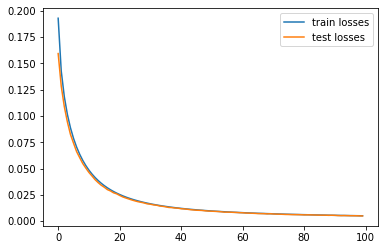

In [14]:
plot_result(train_losses, test_losses)

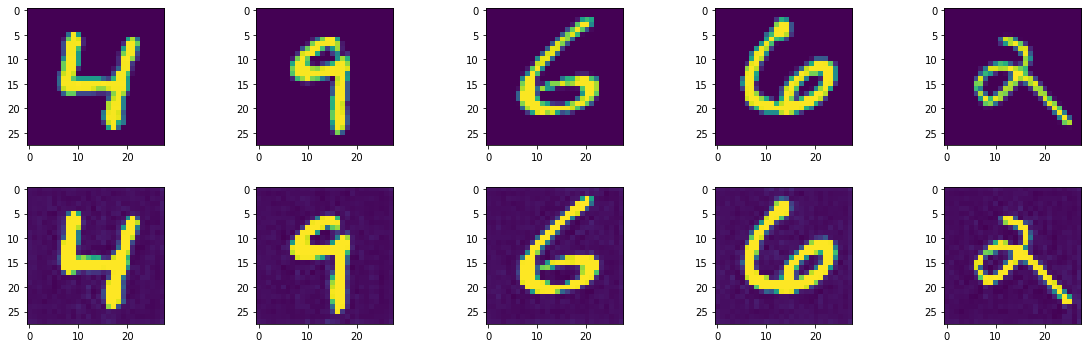

In [22]:
show_result(model, test_loader)

In [10]:
torch.save(model, "mnistae100.model")

## Train Mnist Classification

In [5]:
model_ae = torch.load("mnistae100.model")
model_ae.eval()
def call_ae(x):
    x = model_ae.block1(x)
    x = model_ae.max_pool(x)
    x = model_ae.block2(x)
    x = model_ae.max_pool(x)
    x = model_ae.block3(x)
    return x

model = ClassificationMnist().cuda()

In [6]:
def plot_result(train_losses, train_accuracies, test_accuracies):
    x = list(range(len(train_losses)))

    f, polts = plt.subplots(1, 2)
    f.set_figheight(5)
    f.set_figwidth(15)

    polts[0].plot(x, train_accuracies)
    polts[0].plot(x, test_accuracies)
    polts[0].legend(["train accuracies", "test accuracies"])

    polts[1].plot(x, train_losses)
    polts[1].legend(["train loss"])

    plt.show()

In [7]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Train Epoch: 5 train loss: 1.6015, train accuracy: 235.5106  test accuracy: 231.575
Train Epoch: 10 train loss: 1.5341, train accuracy: 243.8255  test accuracy: 236.825
Train Epoch: 15 train loss: 1.5126, train accuracy: 247.0936  test accuracy: 239.45
Train Epoch: 20 train loss: 1.5012, train accuracy: 249.0255  test accuracy: 240.625
Train Epoch: 25 train loss: 1.494, train accuracy: 250.1489  test accuracy: 241.4
Train Epoch: 30 train loss: 1.4886, train accuracy: 250.983  test accuracy: 242.075
Train Epoch: 35 train loss: 1.4846, train accuracy: 251.5957  test accuracy: 242.5
Train Epoch: 40 train loss: 1.4816, train accuracy: 252.1064  test accuracy: 242.7
Train Epoch: 45 train loss: 1.4792, train accuracy: 252.5064  test accuracy: 242.95
Train Epoch: 50 train loss: 1.4771, train accuracy: 252.7787  test accuracy: 243.2


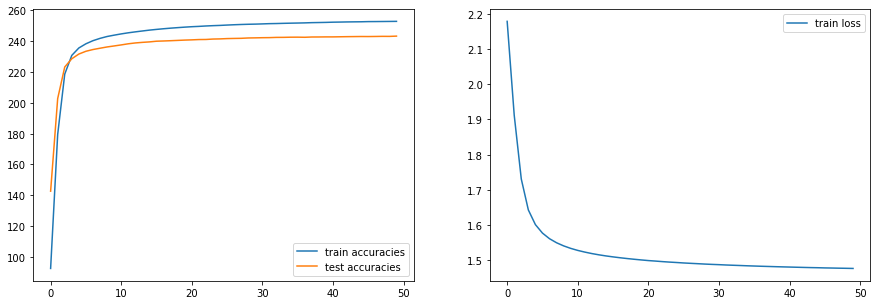

In [8]:
train_losses, train_accuracies, test_accuracies = train_mnist_classification(
    50, call_ae, model, train_loader, test_loader, loss_function, optimizer, noti_rate=5
)
plot_result(train_losses, train_accuracies, test_accuracies)

In [10]:
torch.save(model, "mnist50.model")